<a href="https://colab.research.google.com/github/taisiyasolareva/denoising_using_autoencoders/blob/main/Denoising_images_with_AE_for_fashion_dataset_for_article_for_sys_block.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers import Input, Dense

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


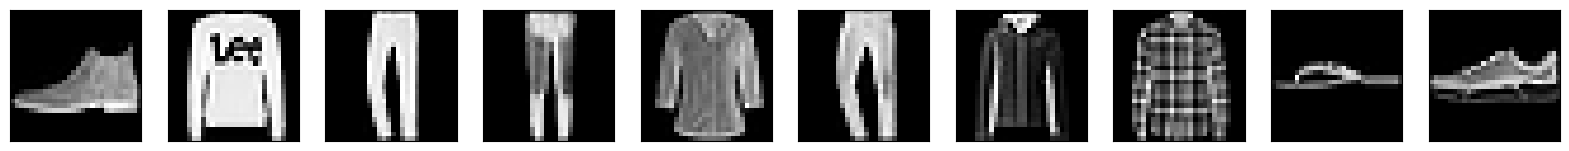

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train_noisy = np.clip(x_train_noisy.astype('float32') / 255., 0., 1.)
x_test_noisy = np.clip(x_test_noisy.astype('float32') / 255., 0., 1.)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train_noisy = x_train_noisy.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))

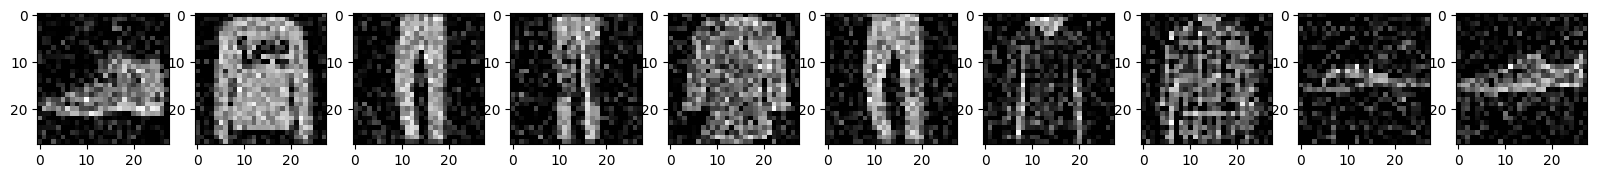

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.gray()
    plt.imshow(x_test_noisy[i].reshape(28, 28))
plt.show()

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/50
235/235 [==============================] - 6s 18ms/step - loss: 0.0989 - val_loss: 0.0091
Epoch 2/50
235/235 [==============================] - 5s 22ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 4/50
235/235 [==============================] - 4s 19ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 5/50
235/235 [==============================] - 7s 28ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 6/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 7/50
235/235 [==============================] - 5s 20ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 8/50
235/235 [==============================] - 5s 20ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 9/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0083 - val_loss: 0.0083
Epoch 10/50
235/235 [==============================] - 5s 21ms/step - loss: 0.0083 - val_lo

In [ ]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test_noisy)


313/313 [==============================] - 1s 2ms/step


In [ ]:
reconstructed_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


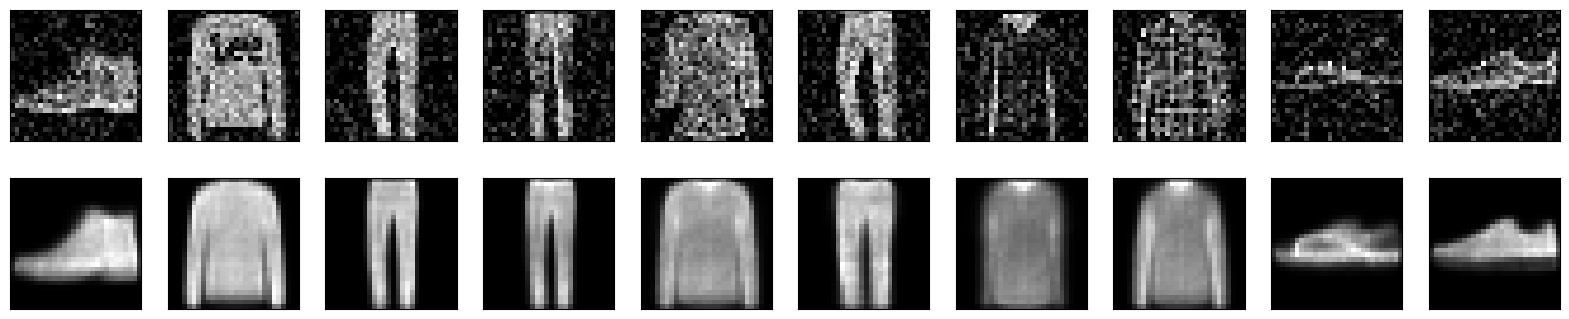

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original noisy image
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()